a. Data Loading:

○ Provide a dataset (e.g., a housing dataset, sales data, or any other

dataset with numerical attributes).

○ Load the dataset and display basic statistics using pandas.describe().

In [26]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
# Load the California housing dataset
california = fetch_california_housing()
# Create a DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
# Display the first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


b. Task 1: Outlier Detection Using Z-score:

○ Instruct students to calculate the Z-scores for a specific numerical

feature (e.g., price or size).

○ Set a threshold for detecting outliers (e.g., Z-score > 3 or Z-score < -3).

○ Identify and count the number of outliers based on the Z-score threshold.

○ Visualize the outliers using scatter plots or box plots.

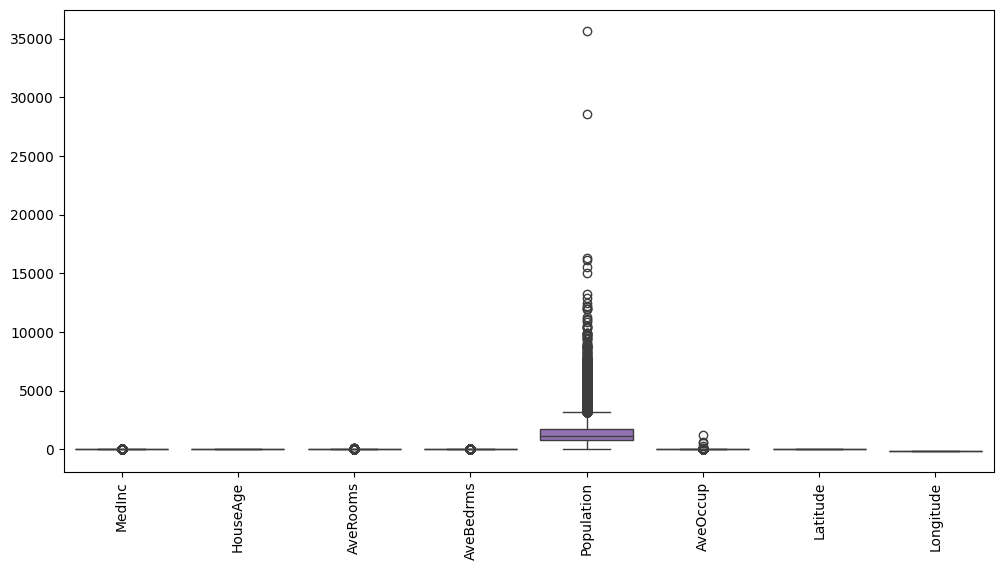

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [28]:
print("Mean value of Population",df['Population'].mean())
print("Std value of Population",df['Population'].std())
print("Min value of Population",df['Population'].min())
print("Max value of Population",df['Population'].max())

Mean value of Population 1425.4767441860465
Std value of Population 1132.462121765341
Min value of Population 3.0
Max value of Population 35682.0


In [29]:
print("Highest allowed",df['Population'].mean() + 3*df['Population'].std())
print("Lowest allowed",df['Population'].mean() - 3*df['Population'].std())

Highest allowed 4822.863109482069
Lowest allowed -1971.9096211099761


In [30]:
df[(df['Population'] > 8.80) | (df['Population'] < 5.11)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [31]:
df['Population_zscore'] = (df['Population'] - df['Population'].mean())/df['Population'].std()

In [32]:
df[df['Population_zscore'] > 3]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Population_zscore
283,5.9849,22.0,6.528724,1.041179,4985.0,2.534316,37.79,-122.16,3.143172
570,7.6110,5.0,6.855776,1.061442,7427.0,2.732524,37.72,-122.24,5.299536
576,7.2634,12.0,7.133034,1.018934,5781.0,2.880419,37.77,-122.06,3.846065
780,3.8171,18.0,5.119733,1.043679,5613.0,2.884378,37.63,-122.10,3.697716
799,2.5158,22.0,4.006152,1.036227,5436.0,3.715653,37.64,-122.07,3.541419
...,...,...,...,...,...,...,...,...,...
20529,2.9605,12.0,4.915341,1.022451,5633.0,2.634705,38.55,-121.78,3.715377
20530,3.1371,11.0,5.070223,1.015530,7984.0,2.695476,38.57,-121.76,5.791384
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76,4.330850
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75,4.778547


In [33]:
df[df['Population_zscore'] < -3]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Population_zscore


In [34]:
df[(df['Population_zscore'] > 3) | (df['Population_zscore'] < -3)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Population_zscore
283,5.9849,22.0,6.528724,1.041179,4985.0,2.534316,37.79,-122.16,3.143172
570,7.6110,5.0,6.855776,1.061442,7427.0,2.732524,37.72,-122.24,5.299536
576,7.2634,12.0,7.133034,1.018934,5781.0,2.880419,37.77,-122.06,3.846065
780,3.8171,18.0,5.119733,1.043679,5613.0,2.884378,37.63,-122.10,3.697716
799,2.5158,22.0,4.006152,1.036227,5436.0,3.715653,37.64,-122.07,3.541419
...,...,...,...,...,...,...,...,...,...
20529,2.9605,12.0,4.915341,1.022451,5633.0,2.634705,38.55,-121.78,3.715377
20530,3.1371,11.0,5.070223,1.015530,7984.0,2.695476,38.57,-121.76,5.791384
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76,4.330850
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75,4.778547


In [35]:
# Trimming
new_df = df[(df['Population_zscore'] < 3) & (df['Population_zscore'] > -3)]
new_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Population_zscore
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,-0.974405
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0.861418
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,-0.820757
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,-0.766010
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,-0.759828
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,-0.512579
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,-0.944382
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,-0.369528
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,-0.604415


In [36]:
upper_limit = df['Population'].mean() + 3*df['Population'].std()
lower_limit = df['Population'].mean() - 3*df['Population'].std()
print(upper_limit)
print(lower_limit)

4822.863109482069
-1971.9096211099761


In [37]:
import numpy as np
df['Population'] = np.where(
df['Population']>upper_limit,
upper_limit,
np.where(
df['Population']<lower_limit,
lower_limit,
df['Population']
)
)

In [38]:
df.shape

(20640, 9)

In [39]:
df['Population'].describe()

count    20640.000000
mean      1391.108439
std        922.310900
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max       4822.863109
Name: Population, dtype: float64

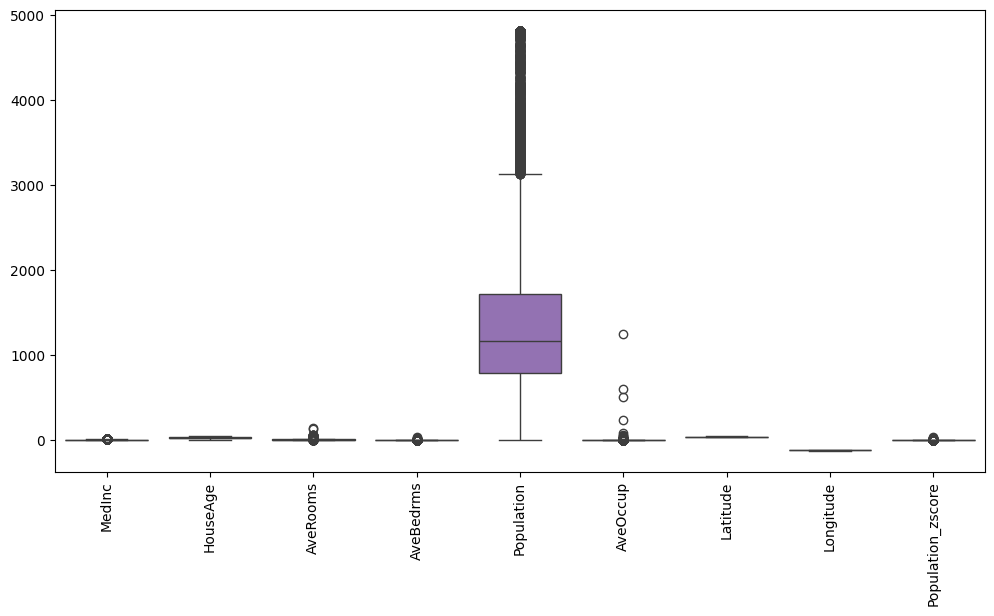

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

c. Task 2: Outlier Detection Using IQR:

○ Calculate the 25th percentile (Q1) and 75th percentile (Q3) of a specific

feature.

○ Compute the IQR (Q3 - Q1) and identify outliers as values below Q1 - 1.5

* IQR or above Q3 + 1.5 * IQR.

○ Remove the outliers and compare the dataset before and after outlier

removal (e.g., using visualizations or statistical summaries).

In [41]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print("IQR= ", IQR)

lowerBound = q1 - 1.5 * IQR
upperBound = q3 + 1.5 * IQR
df = df[~((df < lowerBound) | (df > upperBound)).any(axis=1)]

print("DataFrame after removing outliers:", df)

IQR=  MedInc                 2.179850
HouseAge              19.000000
AveRooms               1.611665
AveBedrms              0.093447
Population           938.000000
AveOccup               0.852520
Latitude               3.780000
Longitude              3.790000
Population_zscore      0.828284
dtype: float64
DataFrame after removing outliers:        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
...       ...       ...       ...        ...         ...       ...       ...   
20634  3.7125      28.0  6.779070   1.148256      1041.0  3.026163     39.27   
20635  1.5603   

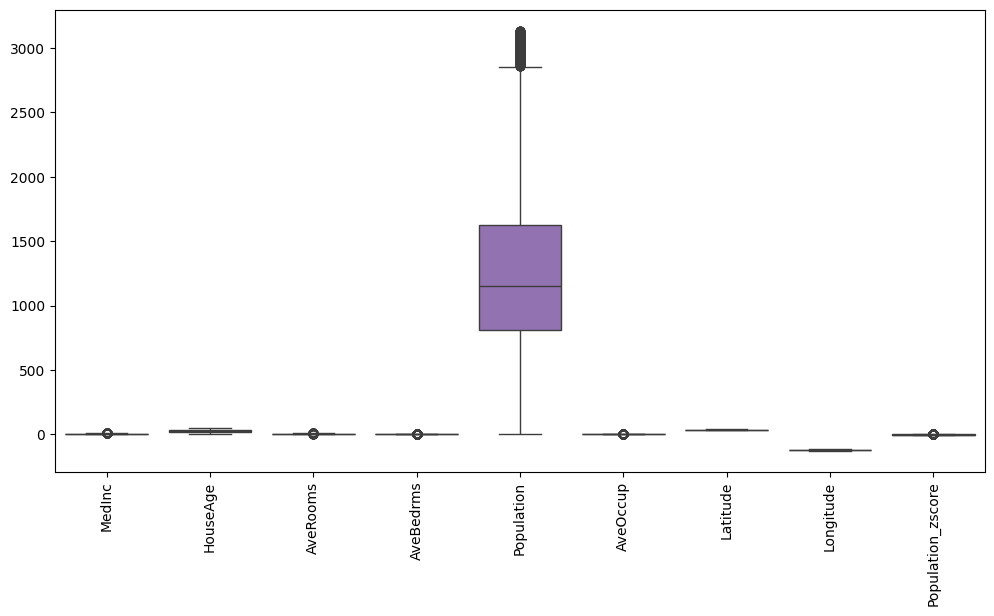

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

1. Data Loading:

○ Provide a dataset (e.g., California Housing, Titanic dataset, etc.).

○ Load the dataset and describe the features using summary statistics

(pandas.describe()).

In [43]:
import pandas as pd
df2=pd.read_csv("titanic.csv")
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Task 1: Standardization (Z-score Scaling):

○ Select one or more numerical features from the dataset (e.g., price, age,

or salary).

○ Apply Z-score standardization to these features using

sklearn.preprocessing.StandardScaler.

○ Display the transformed features and compare the results to the original

data.

○ Visualize the original and standardized data using histograms and box

plots.

In [45]:
df2.columns = df2.columns.str.strip()  # Removes any leading/trailing spaces


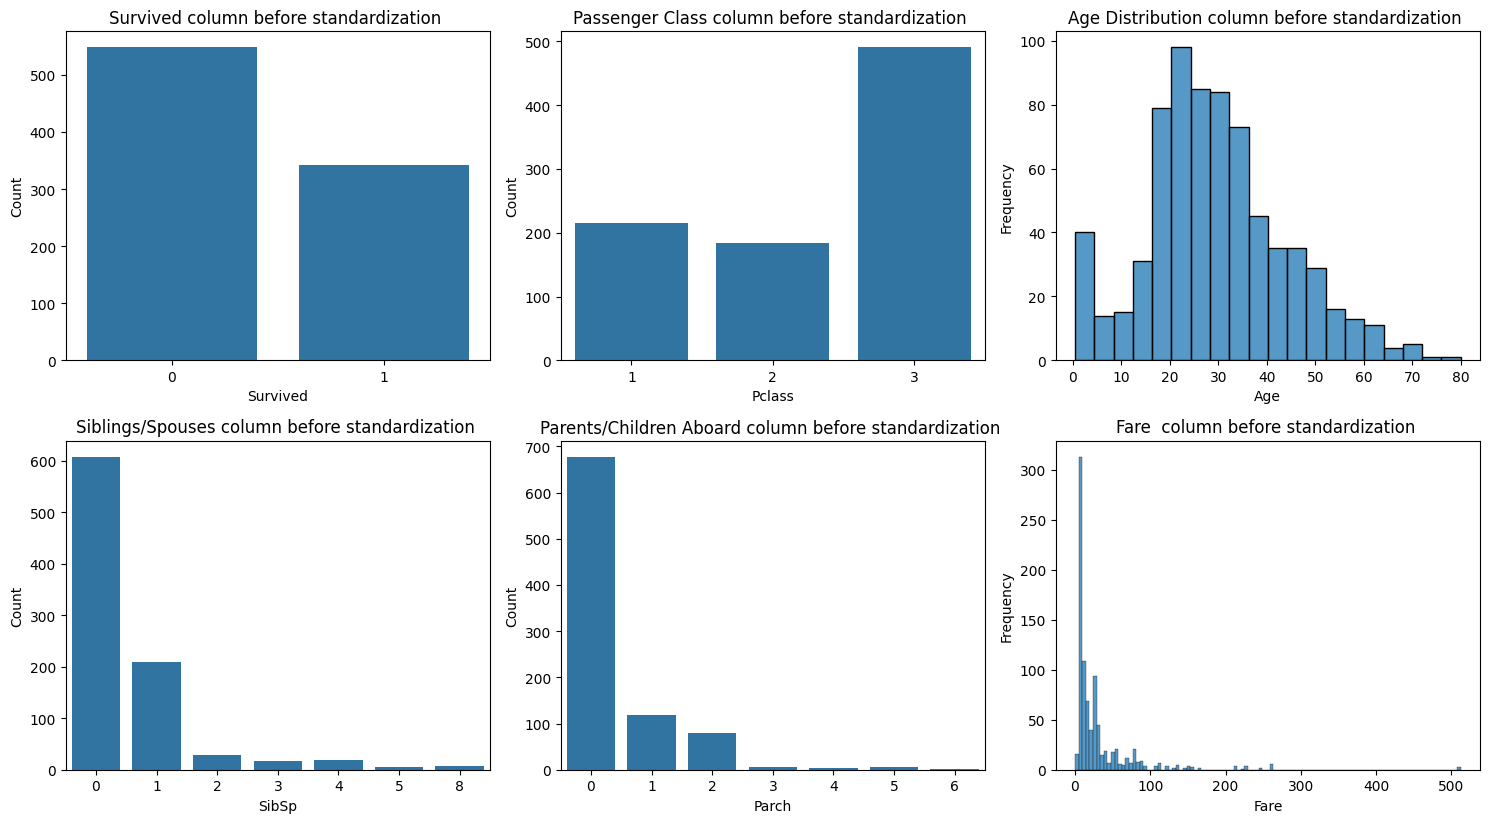

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 12))

# 1. Count plot for 'Survived'
plt.subplot(3, 3, 1)
sns.countplot(data=df2, x='Survived')
plt.title('Survived column before standardization ')
plt.xlabel('Survived')
plt.ylabel('Count')

# 2. Count plot for 'Pclass' with respect to 'Survived'
plt.subplot(3, 3, 2)
sns.countplot(data=df2, x='Pclass')
plt.title('Passenger Class column before standardization ')
plt.xlabel('Pclass')
plt.ylabel('Count')

# 3. Histogram for 'Age' with respect to 'Survived'
plt.subplot(3, 3, 3)
sns.histplot(data=df2, x='Age')
plt.title('Age Distribution column before standardization ')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 4. Histogram for 'SibSp' (Siblings/Spouses Aboard)
plt.subplot(3, 3, 4)
sns.countplot(data=df2, x='SibSp')
plt.title('Siblings/Spouses column before standardization ')
plt.xlabel('SibSp')
plt.ylabel('Count')

# 5. Histogram for 'Parch' (Parents/Children Aboard)
plt.subplot(3, 3, 5)
sns.countplot(data=df2, x='Parch')
plt.title('Parents/Children Aboard column before standardization ')
plt.xlabel('Parch')
plt.ylabel('Count')

# 6. Histogram for 'Fare'
plt.subplot(3, 3, 6)
sns.histplot(data=df2, x='Fare')
plt.title('Fare  column before standardization ')
plt.xlabel('Fare')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()






Age = df2['Age'].values.reshape(-1, 1)
df2['Age']= scaler.fit_transform(Age)

Survived = df2['Survived'].values.reshape(-1, 1)
df2['Survived']= scaler.fit_transform(Survived)

Pclass = df2['Pclass'].values.reshape(-1, 1)
df2['Pclass']= scaler.fit_transform(Pclass)

SibSp = df2['SibSp'].values.reshape(-1, 1)
df2['SibSp']= scaler.fit_transform(SibSp)

Parch = df2['Parch'].values.reshape(-1, 1)
df2['Parch']= scaler.fit_transform(Parch)

Fare = df2['Fare'].values.reshape(-1, 1)
df2['Fare']= scaler.fit_transform(Fare)



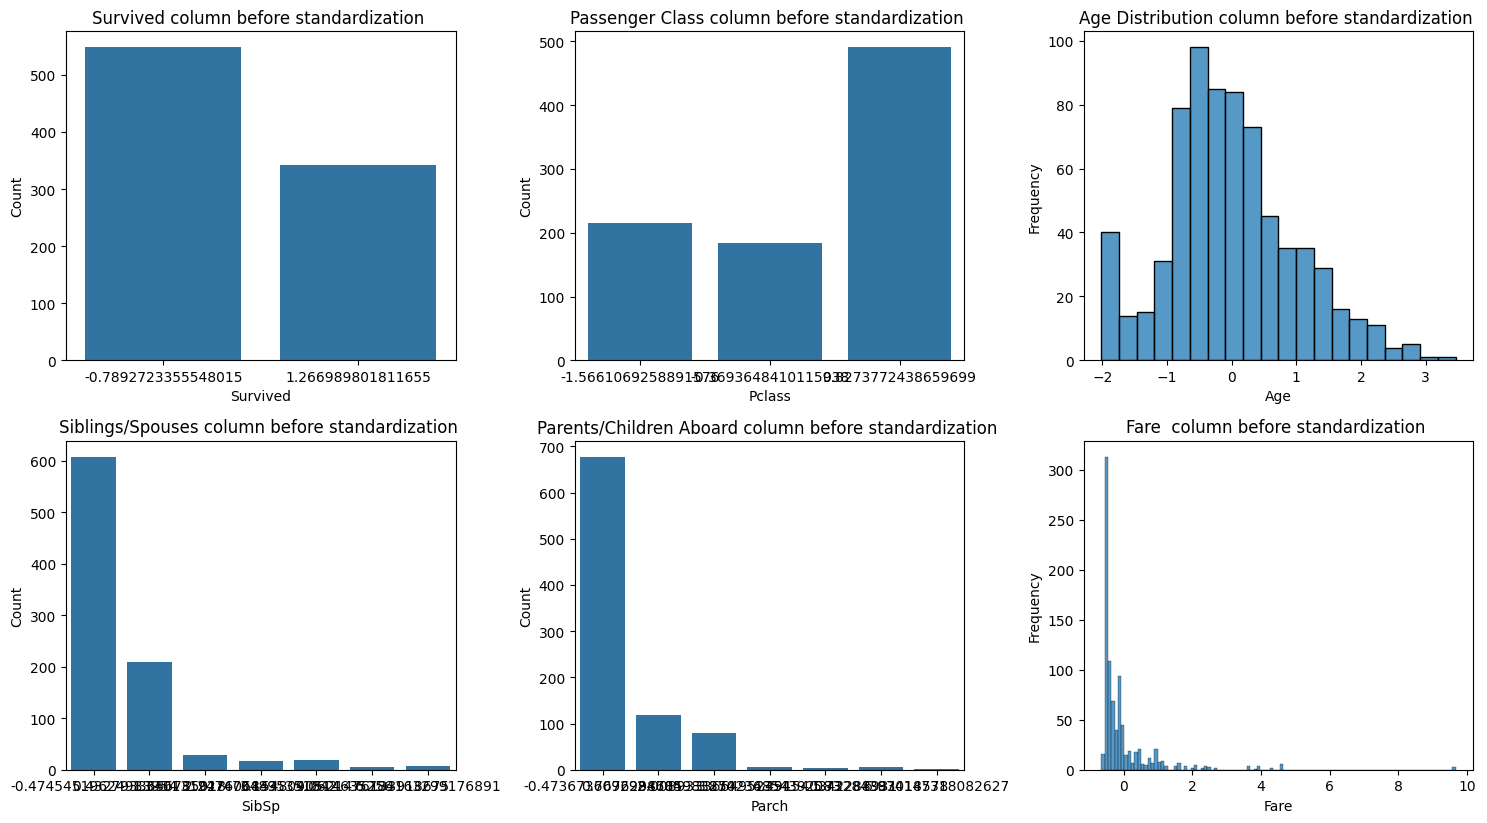

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 12))

# 1. Count plot for 'Survived'
plt.subplot(3, 3, 1)
sns.countplot(data=df2, x='Survived')
plt.title('Survived column before standardization ')
plt.xlabel('Survived')
plt.ylabel('Count')

# 2. Count plot for 'Pclass' with respect to 'Survived'
plt.subplot(3, 3, 2)
sns.countplot(data=df2, x='Pclass')
plt.title('Passenger Class column before standardization ')
plt.xlabel('Pclass')
plt.ylabel('Count')

# 3. Histogram for 'Age' with respect to 'Survived'
plt.subplot(3, 3, 3)
sns.histplot(data=df2, x='Age')
plt.title('Age Distribution column before standardization ')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 4. Histogram for 'SibSp' (Siblings/Spouses Aboard)
plt.subplot(3, 3, 4)
sns.countplot(data=df2, x='SibSp')
plt.title('Siblings/Spouses column before standardization ')
plt.xlabel('SibSp')
plt.ylabel('Count')

# 5. Histogram for 'Parch' (Parents/Children Aboard)
plt.subplot(3, 3, 5)
sns.countplot(data=df2, x='Parch')
plt.title('Parents/Children Aboard column before standardization ')
plt.xlabel('Parch')
plt.ylabel('Count')

# 6. Histogram for 'Fare'
plt.subplot(3, 3, 6)
sns.histplot(data=df2, x='Fare')
plt.title('Fare  column before standardization ')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [49]:
print(df2.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


3. Task 2: Min-Max Scaling:

○ Apply Min-Max scaling to the same features using

sklearn.preprocessing.MinMaxScaler.

○ Display and compare the transformed features with the original data.

○ Visualize the original and Min-Max scaled data.

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [51]:
scaler = MinMaxScaler()

columns_to_scale = ['Age', 'Fare', 'SibSp', 'Parch']

df2_scaled = df2.copy()  
df2_scaled[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

print("Scaled Data: ", df2_scaled.head())


Scaled Data:     PassengerId  Survived    Pclass  \
0            1 -0.789272  0.827377   
1            2  1.266990 -1.566107   
2            3  1.266990  0.827377   
3            4  1.266990 -1.566107   
4            5 -0.789272  0.827377   

                                                Name     Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  0.271174  0.125   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229  0.125   
2                             Heikkinen, Miss. Laina  female  0.321438  0.000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531  0.125   
4                           Allen, Mr. William Henry    male  0.434531  0.000   

   Parch            Ticket      Fare Cabin Embarked  
0    0.0         A/5 21171  0.014151   NaN        S  
1    0.0          PC 17599  0.139136   C85        C  
2    0.0  STON/O2. 3101282  0.015469   NaN        S  
3    0.0            113803  0.103644  C123        S  


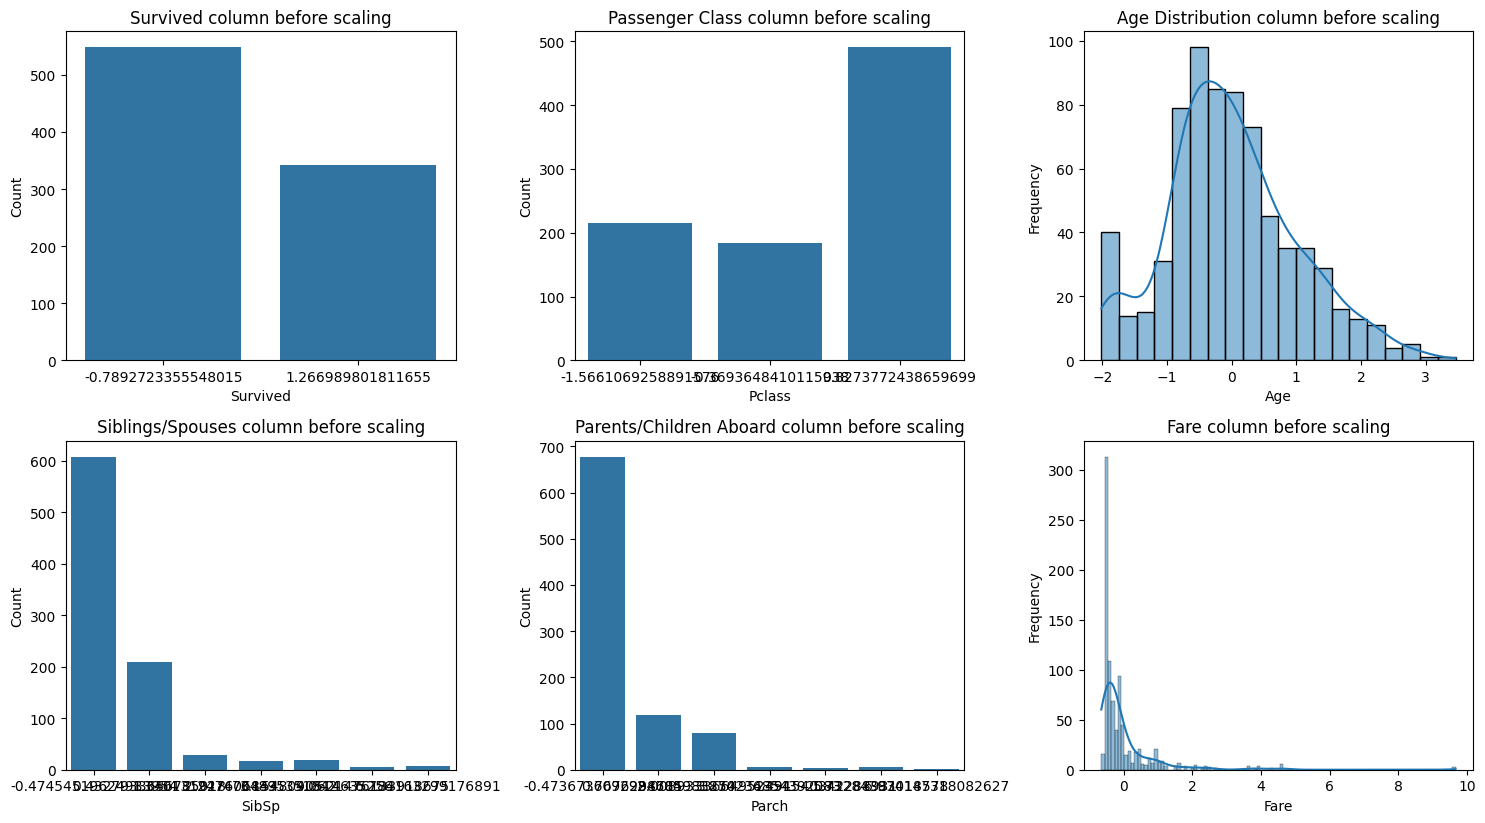

In [52]:
plt.figure(figsize=(15, 12))


plt.subplot(3, 3, 1)
sns.countplot(data=df2, x='Survived')
plt.title('Survived column before scaling')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.subplot(3, 3, 2)
sns.countplot(data=df2, x='Pclass')
plt.title('Passenger Class column before scaling')
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.subplot(3, 3, 3)
sns.histplot(data=df2, x='Age', kde=True)
plt.title('Age Distribution column before scaling')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(3, 3, 4)
sns.countplot(data=df2, x='SibSp')
plt.title('Siblings/Spouses column before scaling')
plt.xlabel('SibSp')
plt.ylabel('Count')

plt.subplot(3, 3, 5)
sns.countplot(data=df2, x='Parch')
plt.title('Parents/Children Aboard column before scaling')
plt.xlabel('Parch')
plt.ylabel('Count')

plt.subplot(3, 3, 6)
sns.histplot(data=df2, x='Fare', kde=True)
plt.title('Fare column before scaling')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


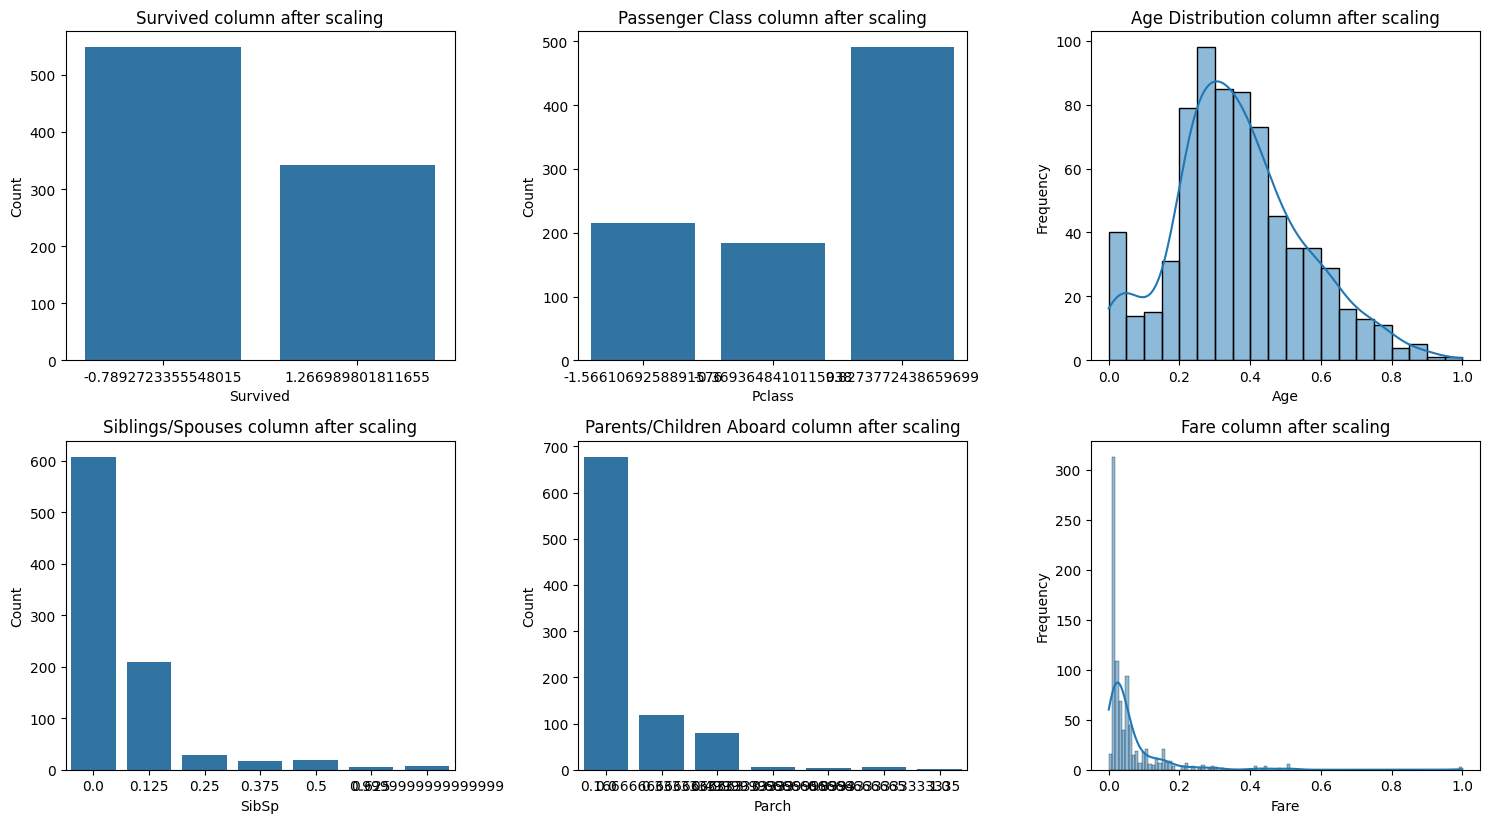

In [53]:
plt.figure(figsize=(15, 12))


plt.subplot(3, 3, 1)
sns.countplot(data=df2_scaled, x='Survived')
plt.title('Survived column after scaling')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.subplot(3, 3, 2)
sns.countplot(data=df2_scaled, x='Pclass')
plt.title('Passenger Class column after scaling')
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.subplot(3, 3, 3)
sns.histplot(data=df2_scaled, x='Age', kde=True)
plt.title('Age Distribution column after scaling')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(3, 3, 4)
sns.countplot(data=df2_scaled, x='SibSp')
plt.title('Siblings/Spouses column after scaling')
plt.xlabel('SibSp')
plt.ylabel('Count')

plt.subplot(3, 3, 5)
sns.countplot(data=df2_scaled, x='Parch')
plt.title('Parents/Children Aboard column after scaling')
plt.xlabel('Parch')
plt.ylabel('Count')

plt.subplot(3, 3, 6)
sns.histplot(data=df2_scaled, x='Fare', kde=True)
plt.title('Fare column after scaling')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
